# Load Dataset

In [1]:
from lib import FFNN
from lib import matrix as Matrix
from lib import activation as Activation
from lib import loss as Loss
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

In [3]:
# Load data from OpenML
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

# Split into training (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [4]:
# One-Hot Encoding: Convert labels to one-hot vectors
from sklearn.preprocessing import OneHotEncoder

y_train = OneHotEncoder(sparse_output=False).fit_transform(y_train.reshape(-1, 1))
y_val = OneHotEncoder(sparse_output=False).fit_transform(y_val.reshape(-1, 1))

# Train model

### Base Parameters

In [5]:
base_hidden_layer = [784, 128, 64, 10]
base_activation = Activation.tanh
base_learning_rate = 0.01
base_epochs = 20
# base_weight_init = .initializeWeightRandomUniform(-1, 1)
base_batch_size = 32

### Base Model

In [27]:
base_model = FFNN.FFNN(base_hidden_layer, X_train, y_train, X_val, y_val, base_learning_rate)
base_model.setActivationUniform(base_activation)
base_model.initializeWeightRandomUniform(-1, 1)

base_model_train_loss, base_model_val_loss = base_model.train(batch_size=base_batch_size, learning_rate=base_learning_rate, epochs=base_epochs)

 [Epoch 1]:	Training Loss: 0.0027099407614237245	Validation Loss: 0.0571544548208529	Progress: [█                   ]
 [Epoch 2]:	Training Loss: 0.001706889483943063	Validation Loss: 0.05210085521640847	Progress: [██                  ]
 [Epoch 3]:	Training Loss: 0.0015966776277596892	Validation Loss: 0.04967947677031759	Progress: [███                 ]
 [Epoch 4]:	Training Loss: 0.001524799263901508	Validation Loss: 0.04718012494877014	Progress: [████                ]
 [Epoch 5]:	Training Loss: 0.0014714891992633086	Validation Loss: 0.04624765845043547	Progress: [█████               ]
 [Epoch 6]:	Training Loss: 0.0014176629959564682	Validation Loss: 0.04444701174706174	Progress: [██████              ]
 [Epoch 7]:	Training Loss: 0.001373547490030896	Validation Loss: 0.04282773304071671	Progress: [███████             ]
 [Epoch 8]:	Training Loss: 0.0013135754875201009	Validation Loss: 0.04101992988362089	Progress: [████████            ]
 [Epoch 9]:	Training Loss: 0.001244359535475869	Vali

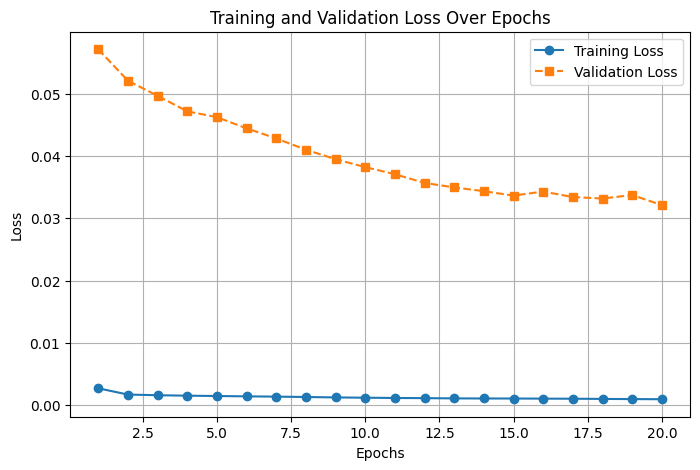

In [28]:
import matplotlib.pyplot as plt
import numpy as np

epochs = np.arange(1, len(base_model_train_loss) + 1)

# Plot losses
plt.figure(figsize=(8, 5))
plt.plot(epochs, base_model_train_loss, label="Training Loss", marker="o")
plt.plot(epochs, base_model_val_loss, label="Validation Loss", marker="s", linestyle="--")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Epochs")
plt.legend()
plt.grid(True)
plt.show()

In [29]:
base_model.save("models/base_model")

 File Successfuly Saved to: 'models/base_model'


### Activation Function as Variable

##### Linear

In [8]:
linear_model = FFNN.FFNN(base_hidden_layer, X_train, y_train, X_val, y_val, base_learning_rate)
linear_model.setActivationUniform(Activation.linear)
linear_model.initializeWeightZeros()

linear_model_train_loss, linear_model_val_loss = linear_model.train(batch_size=base_batch_size, learning_rate=base_learning_rate, epochs=base_epochs)
linear_model.save("models/linear_model")

 [Epoch 1]:	Training Loss: 0.028516668101041382	Validation Loss: 0.9052663594771475	Progress: [█                   ]
 [Epoch 2]:	Training Loss: 0.028514724605130794	Validation Loss: 0.9052663594771475	Progress: [██                  ]
 [Epoch 3]:	Training Loss: 0.028514724605130794	Validation Loss: 0.9052663594771475	Progress: [███                 ]
 [Epoch 4]:	Training Loss: 0.028514724605130794	Validation Loss: 0.9052663594771475	Progress: [████                ]
 [Epoch 5]:	Training Loss: 0.028514724605130794	Validation Loss: 0.9052663594771475	Progress: [█████               ]
 [Epoch 6]:	Training Loss: 0.028514724605130794	Validation Loss: 0.9052663594771475	Progress: [██████              ]
 [Epoch 7]:	Training Loss: 0.028514724605130794	Validation Loss: 0.9052663594771475	Progress: [███████             ]
 [Epoch 8]:	Training Loss: 0.028514724605130794	Validation Loss: 0.9052663594771475	Progress: [████████            ]
 [Epoch 9]:	Training Loss: 0.028514724605130794	Validation Loss:

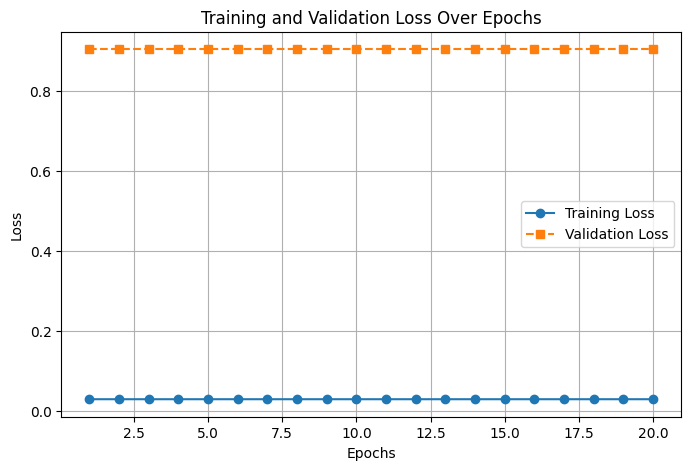

In [9]:
epochs = np.arange(1, base_epochs + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, linear_model_train_loss, label="Training Loss", marker="o")
plt.plot(epochs, linear_model_val_loss, label="Validation Loss", marker="s", linestyle="--")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Epochs")
plt.legend()
plt.grid(True)
plt.show()

##### ReLU

In [14]:
relu_model = FFNN.FFNN(base_hidden_layer, X_train, y_train, X_val, y_val, base_learning_rate)
relu_model.setActivationUniform(Activation.relu)
relu_model.initializeWeightRandomUniform(-1, 1)

relu_model_train_loss, relu_model_val_loss = relu_model.train(batch_size=base_batch_size, learning_rate=0.2, epochs=base_epochs)
relu_model.save("models/relu_model")

 [Epoch 1]:	Training Loss: 26954.92118861607	Validation Loss: 1.0	Progress: [█                   ]
 [Epoch 2]:	Training Loss: 0.03125	Validation Loss: 1.0	Progress: [██                  ]
 [Epoch 3]:	Training Loss: 0.03125	Validation Loss: 1.0	Progress: [███                 ]
 [Epoch 4]:	Training Loss: 0.03125	Validation Loss: 1.0	Progress: [████                ]
 [Epoch 5]:	Training Loss: 0.03125	Validation Loss: 1.0	Progress: [█████               ]
 [Epoch 6]:	Training Loss: 0.03125	Validation Loss: 1.0	Progress: [██████              ]


KeyboardInterrupt: 

In [ ]:
epochs = np.arange(1, base_epochs + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, relu_model_train_loss, label="Training Loss", marker="o")
plt.plot(epochs, relu_model_val_loss, label="Validation Loss", marker="s", linestyle="--")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Epochs")
plt.legend()
plt.grid(True)
plt.show()

##### Sigmoid

In [40]:
sigmoid_model = FFNN.FFNN(base_hidden_layer, X_train, y_train, X_val, y_val, base_learning_rate)
sigmoid_model.setActivationUniform(Activation.sigmoid)
sigmoid_model.initializeWeightRandomUniform(-1, 1)

sigmoid_model_train_loss, sigmoid_model_val_loss = sigmoid_model.train(batch_size=base_batch_size, learning_rate=base_learning_rate, epochs=base_epochs)
sigmoid_model.save("models/sigmoid_model")

 [Epoch 1]:	Training Loss: 0.002072876944039424	Validation Loss: 0.042733665617380116	Progress: [█                   ]
 [Epoch 2]:	Training Loss: 0.0011467926778048457	Validation Loss: 0.03336280948273385	Progress: [██                  ]
 [Epoch 3]:	Training Loss: 0.0009683211382385292	Validation Loss: 0.02839238021826575	Progress: [███                 ]
 [Epoch 4]:	Training Loss: 0.0008830960312775147	Validation Loss: 0.027122366999443176	Progress: [████                ]
 [Epoch 5]:	Training Loss: 0.000786795217030591	Validation Loss: 0.023952391996774618	Progress: [█████               ]
 [Epoch 6]:	Training Loss: 0.0007868146906114134	Validation Loss: 0.024543150253779386	Progress: [██████              ]
 [Epoch 7]:	Training Loss: 0.000770604615132999	Validation Loss: 0.023897984593115675	Progress: [███████             ]
 [Epoch 8]:	Training Loss: 0.0007109624765322537	Validation Loss: 0.02237637278422594	Progress: [████████            ]
 [Epoch 9]:	Training Loss: 0.00072104267851621

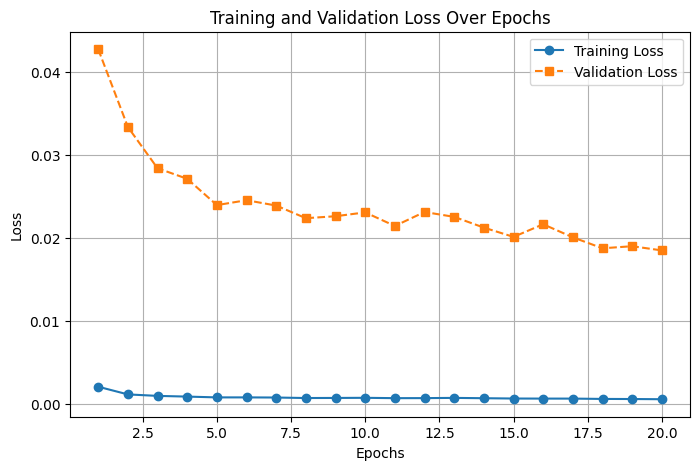

In [41]:
epochs = np.arange(1, base_epochs + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, sigmoid_model_train_loss, label="Training Loss", marker="o")
plt.plot(epochs, sigmoid_model_val_loss, label="Validation Loss", marker="s", linestyle="--")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Epochs")
plt.legend()
plt.grid(True)
plt.show()

### Learning Rate as Variable

##### n = 0.05

In [42]:
lr1_model = FFNN.FFNN(base_hidden_layer, X_train, y_train, X_val, y_val, learning_rate=0.05)
lr1_model.setActivationUniform(Activation.tanh)
lr1_model.initializeWeightRandomUniform(-1, 1)

lr1_model_train_loss, lr1_model_val_loss = lr1_model.train(batch_size=base_batch_size, learning_rate=0.05, epochs=base_epochs)
lr1_model.save("models/lr1_model")

 [Epoch 1]:	Training Loss: 0.01832665058258044	Validation Loss: 0.9355505105004522	Progress: [█                   ]
 [Epoch 2]:	Training Loss: 0.017851388982702596	Validation Loss: 0.4423243814352992	Progress: [██                  ]
 [Epoch 3]:	Training Loss: 0.016716728498849785	Validation Loss: 0.4902867678351085	Progress: [███                 ]
 [Epoch 4]:	Training Loss: 0.018513896134283725	Validation Loss: 0.47169322339967745	Progress: [████                ]
 [Epoch 5]:	Training Loss: 0.017083698849511175	Validation Loss: 0.4845581246615874	Progress: [█████               ]
 [Epoch 6]:	Training Loss: 0.015617140364123195	Validation Loss: 0.46803318398118027	Progress: [██████              ]
 [Epoch 7]:	Training Loss: 0.017614992329068158	Validation Loss: 0.7197269103432613	Progress: [███████             ]
 [Epoch 8]:	Training Loss: 0.015680575799493068	Validation Loss: 0.3938348212684547	Progress: [████████            ]
 [Epoch 9]:	Training Loss: 0.014738183601505568	Validation Loss

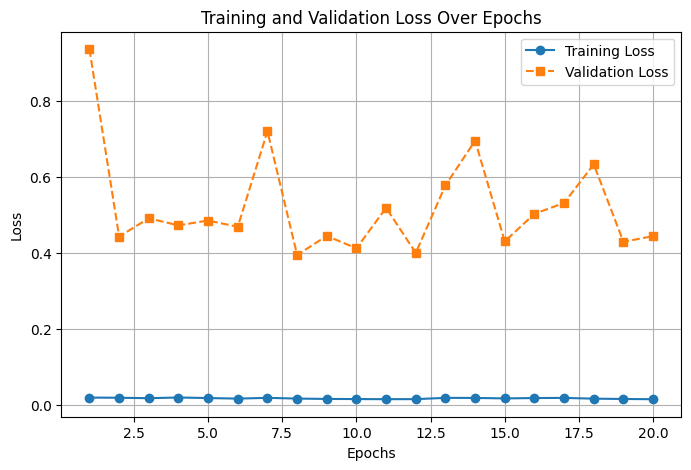

In [ ]:
epochs = np.arange(1, base_epochs + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, lr1_model_train_loss, label="Training Loss", marker="o")
plt.plot(epochs, lr1_model_val_loss, label="Validation Loss", marker="s", linestyle="--")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Epochs")
plt.legend()
plt.grid(True)

plt.show()

##### n = 0.20

In [44]:
lr2_model = FFNN.FFNN(base_hidden_layer, X_train, y_train, X_val, y_val, learning_rate=0.2)
lr2_model.setActivationUniform(Activation.tanh)
lr2_model.initializeWeightRandomUniform(-1, 1)

lr2_model_train_loss, lr2_model_val_loss = lr2_model.train(batch_size=base_batch_size, learning_rate=0.2, epochs=base_epochs)
lr2_model.save("models/lr2_model")

 [Epoch 1]:	Training Loss: 0.029520046810296106	Validation Loss: 0.9118799512386093	Progress: [█                   ]
 [Epoch 2]:	Training Loss: 0.029587138474194124	Validation Loss: 0.92943932306647	Progress: [██                  ]
 [Epoch 3]:	Training Loss: 0.029477668924649262	Validation Loss: 0.9768449224212542	Progress: [███                 ]
 [Epoch 4]:	Training Loss: 0.02944238895803331	Validation Loss: 0.96838829862165	Progress: [████                ]
 [Epoch 5]:	Training Loss: 0.028978667257752687	Validation Loss: 0.9407026219885027	Progress: [█████               ]
 [Epoch 6]:	Training Loss: 0.028997464839148602	Validation Loss: 0.9138975698882214	Progress: [██████              ]
 [Epoch 7]:	Training Loss: 0.029012181631419835	Validation Loss: 0.9519523170330418	Progress: [███████             ]
 [Epoch 8]:	Training Loss: 0.02904425911967591	Validation Loss: 0.9240890309803287	Progress: [████████            ]
 [Epoch 9]:	Training Loss: 0.029103460341975206	Validation Loss: 0.973

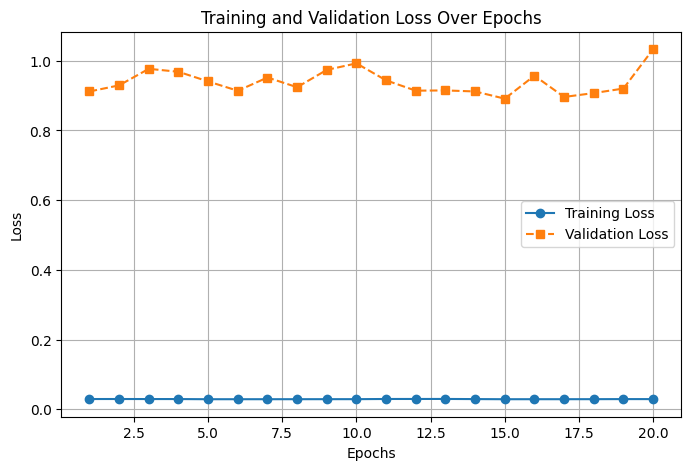

In [45]:
epochs = np.arange(1, base_epochs + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, lr2_model_train_loss, label="Training Loss", marker="o")
plt.plot(epochs, lr2_model_val_loss, label="Validation Loss", marker="s", linestyle="--")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Epochs")
plt.legend()
plt.grid(True)
plt.show()

##### n = 0.001

In [ ]:
lr3_model = FFNN.FFNN(base_hidden_layer, X_train, y_train, X_val, y_val, learning_rate=0.001)
lr3_model.setActivationUniform(Activation.tanh)
lr3_model.initializeWeightRandomUniform(-1, 1)

lr3_model_train_loss, lr3_model_val_loss = lr3_model.train(batch_size=base_batch_size, learning_rate=0.001, epochs=base_epochs)
lr3_model.save("models/lr3_model")

 [Epoch 1]:	Training Loss: 0.03949809443919014	Validation Loss: 0.37656514513668377	Progress: [█                   ]
 [Epoch 2]:	Training Loss: 0.0108290950185479	Validation Loss: 0.3244241285155797	Progress: [██                  ]
 [Epoch 3]:	Training Loss: 0.009665182714327578	Validation Loss: 0.2917324458606988	Progress: [███                 ]
 [Epoch 4]:	Training Loss: 0.008978960482349028	Validation Loss: 0.28375788720561423	Progress: [████                ]
 [Epoch 5]:	Training Loss: 0.00902240148247882	Validation Loss: 0.28736164242049844	Progress: [█████               ]
 [Epoch 6]:	Training Loss: 0.008817598662964943	Validation Loss: 0.2796632331655023	Progress: [██████              ]
 [Epoch 7]:	Training Loss: 0.008787625747318081	Validation Loss: 0.27608459945640057	Progress: [███████             ]
 [Epoch 8]:	Training Loss: 0.008799218267173683	Validation Loss: 0.2757688830978157	Progress: [████████            ]
 [Epoch 9]:	Training Loss: 0.008571730298279344	Validation Loss:

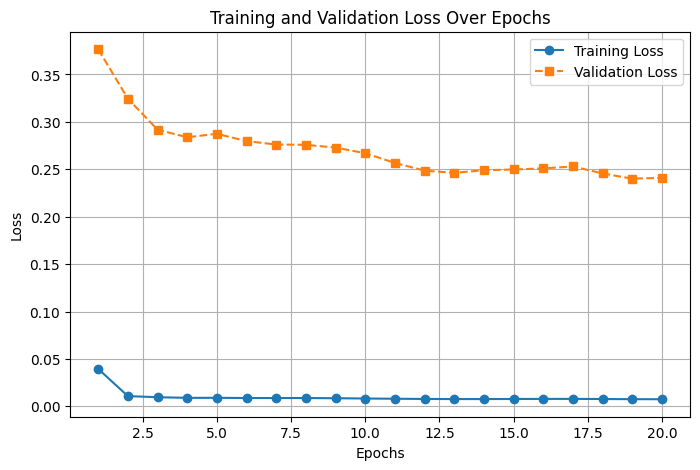

In [16]:
epochs = np.arange(1, base_epochs + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, lr3_model_train_loss, label="Training Loss", marker="o")
plt.plot(epochs, lr3_model_val_loss, label="Validation Loss", marker="s", linestyle="--")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Epochs")
plt.legend()
plt.grid(True)
plt.show()

### Weight Initialization as Variable

##### Zero Weights

In [48]:
zero_weights_model = FFNN.FFNN(base_hidden_layer, X_train, y_train, X_val, y_val, learning_rate=base_learning_rate)
zero_weights_model.setActivationUniform(Activation.tanh)
zero_weights_model.initializeWeightZeros()

zero_weights_model_train_loss, zero_weights_model_val_loss = zero_weights_model.train(batch_size=base_batch_size, learning_rate=base_learning_rate, epochs=base_epochs)
zero_weights_model.save("models/zero_weights_model")

 [Epoch 1]:	Training Loss: 0.002827781248851372	Validation Loss: 0.09024793327689644	Progress: [█                   ]
 [Epoch 2]:	Training Loss: 0.002827445735569724	Validation Loss: 0.09024793327689644	Progress: [██                  ]
 [Epoch 3]:	Training Loss: 0.002827445735569724	Validation Loss: 0.09024793327689644	Progress: [███                 ]
 [Epoch 4]:	Training Loss: 0.002827445735569724	Validation Loss: 0.09024793327689644	Progress: [████                ]
 [Epoch 5]:	Training Loss: 0.002827445735569724	Validation Loss: 0.09024793327689644	Progress: [█████               ]
 [Epoch 6]:	Training Loss: 0.002827445735569724	Validation Loss: 0.09024793327689644	Progress: [██████              ]
 [Epoch 7]:	Training Loss: 0.002827445735569724	Validation Loss: 0.09024793327689644	Progress: [███████             ]
 [Epoch 8]:	Training Loss: 0.002827445735569724	Validation Loss: 0.09024793327689644	Progress: [████████            ]
 [Epoch 9]:	Training Loss: 0.002827445735569724	Validati

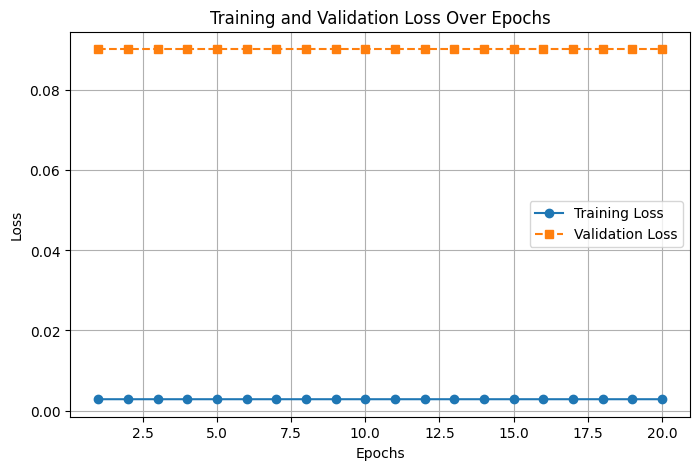

In [49]:
epochs = np.arange(1, base_epochs + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, zero_weights_model_train_loss, label="Training Loss", marker="o")
plt.plot(epochs, zero_weights_model_val_loss, label="Validation Loss", marker="s", linestyle="--")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Epochs")
plt.legend()
plt.grid(True)
plt.show()

##### Random Uniform

In [50]:
random_uniform_weights_model = base_model

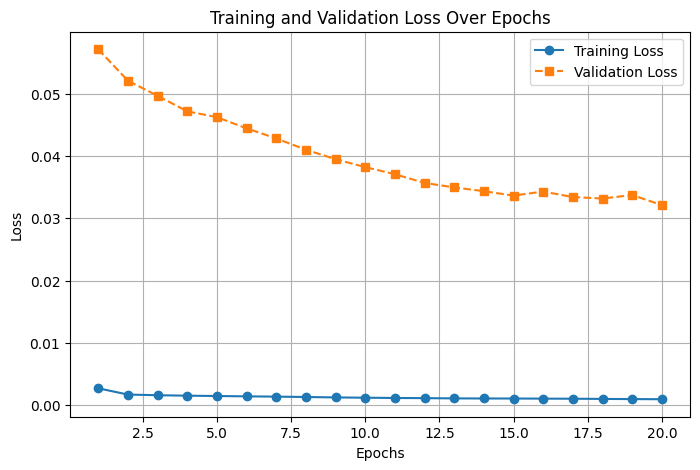

In [51]:
epochs = np.arange(1, base_epochs + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, base_model_train_loss, label="Training Loss", marker="o")
plt.plot(epochs, base_model_val_loss, label="Validation Loss", marker="s", linestyle="--")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Epochs")
plt.legend()
plt.grid(True)
plt.show()

##### Random Normal

In [52]:
random_normal_weights_model = FFNN.FFNN(base_hidden_layer, X_train, y_train, X_val, y_val, learning_rate=base_learning_rate)
random_normal_weights_model.setActivationUniform(Activation.tanh)
random_normal_weights_model.initializeWeightRandomNormal(0, 1)

random_normal_weights_model_train_loss, random_normal_weights_model_val_loss = random_normal_weights_model.train(batch_size=base_batch_size, learning_rate=base_learning_rate, epochs=base_epochs)
random_normal_weights_model.save("models/random_normal_weights_model")

 [Epoch 1]:	Training Loss: 0.003227543814136077	Validation Loss: 0.06436208008585514	Progress: [█                   ]
 [Epoch 2]:	Training Loss: 0.0019487975811172597	Validation Loss: 0.060138432774492115	Progress: [██                  ]
 [Epoch 3]:	Training Loss: 0.0018338003638948591	Validation Loss: 0.05918530001053791	Progress: [███                 ]
 [Epoch 4]:	Training Loss: 0.001762201944007271	Validation Loss: 0.05680446560003757	Progress: [████                ]
 [Epoch 5]:	Training Loss: 0.0017202945959709987	Validation Loss: 0.05364807265487833	Progress: [█████               ]
 [Epoch 6]:	Training Loss: 0.0016740236533634419	Validation Loss: 0.05325718835678208	Progress: [██████              ]
 [Epoch 7]:	Training Loss: 0.0016366170420036511	Validation Loss: 0.05149971201804255	Progress: [███████             ]
 [Epoch 8]:	Training Loss: 0.0016085555944471974	Validation Loss: 0.05219497341825922	Progress: [████████            ]
 [Epoch 9]:	Training Loss: 0.0015792894873998104	

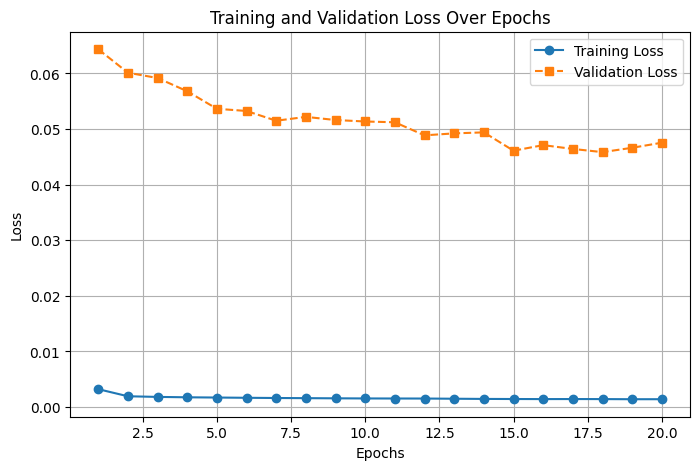

In [53]:
epochs = np.arange(1, base_epochs + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, random_normal_weights_model_train_loss, label="Training Loss", marker="o")
plt.plot(epochs, random_normal_weights_model_val_loss, label="Validation Loss", marker="s", linestyle="--")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Epochs")
plt.legend()
plt.grid(True)
plt.show()

### Depth and Width as Variable

##### Constant Depth [2 hidden layers]

[784, 32, 32, 10]

In [54]:
cd1_model = FFNN.FFNN([784, 32, 32, 10], X_train, y_train, X_val, y_val, learning_rate=base_learning_rate)
cd1_model.setActivationUniform(Activation.tanh)
cd1_model.initializeWeightRandomUniform(-1, 1)

cd1_model_train_loss, cd1_model_val_loss = cd1_model.train(batch_size=base_batch_size, learning_rate=base_learning_rate, epochs=base_epochs)
cd1_model.save("models/cd1_model")

 [Epoch 1]:	Training Loss: 0.001993413826618404	Validation Loss: 0.03935695558488471	Progress: [█                   ]
 [Epoch 2]:	Training Loss: 0.0011637838878720379	Validation Loss: 0.03414250820120088	Progress: [██                  ]
 [Epoch 3]:	Training Loss: 0.0010535505204276692	Validation Loss: 0.030970632465083216	Progress: [███                 ]
 [Epoch 4]:	Training Loss: 0.0009638409042403008	Validation Loss: 0.02952029307909131	Progress: [████                ]
 [Epoch 5]:	Training Loss: 0.0009037317409854668	Validation Loss: 0.0277752670834018	Progress: [█████               ]
 [Epoch 6]:	Training Loss: 0.0008520857372911044	Validation Loss: 0.026230477213554496	Progress: [██████              ]
 [Epoch 7]:	Training Loss: 0.0008326056054323164	Validation Loss: 0.026393538592013047	Progress: [███████             ]
 [Epoch 8]:	Training Loss: 0.0008247237037849512	Validation Loss: 0.02717660366249313	Progress: [████████            ]
 [Epoch 9]:	Training Loss: 0.000812288796304669

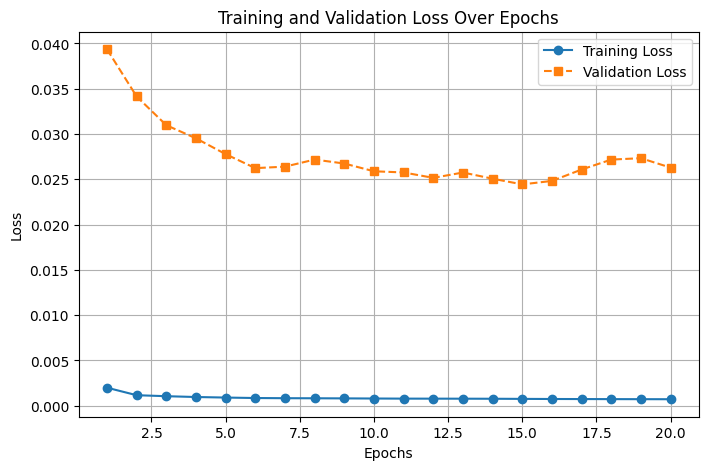

In [55]:
epochs = np.arange(1, base_epochs + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, cd1_model_train_loss, label="Training Loss", marker="o")
plt.plot(epochs, cd1_model_val_loss, label="Validation Loss", marker="s", linestyle="--")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Epochs")
plt.legend()
plt.grid(True)
plt.show()

[784, 32, 128, 10]

In [56]:
cd2_model = FFNN.FFNN([784, 32, 128, 10], X_train, y_train, X_val, y_val, learning_rate=base_learning_rate)
cd2_model.setActivationUniform(Activation.tanh)
cd2_model.initializeWeightRandomUniform(-1, 1)

cd2_model_train_loss, cd2_model_val_loss = cd2_model.train(batch_size=base_batch_size, learning_rate=base_learning_rate, epochs=base_epochs)
cd2_model.save("models/cd2_model")

 [Epoch 1]:	Training Loss: 0.004152205716794555	Validation Loss: 0.07659606130320927	Progress: [█                   ]
 [Epoch 2]:	Training Loss: 0.0018979399301274306	Validation Loss: 0.05037814282251015	Progress: [██                  ]
 [Epoch 3]:	Training Loss: 0.0013872796390054464	Validation Loss: 0.039154302853137056	Progress: [███                 ]
 [Epoch 4]:	Training Loss: 0.001165505313689666	Validation Loss: 0.03495597156071559	Progress: [████                ]
 [Epoch 5]:	Training Loss: 0.0010353804291685091	Validation Loss: 0.031990815896122585	Progress: [█████               ]
 [Epoch 6]:	Training Loss: 0.0009642207330488024	Validation Loss: 0.030154031081920774	Progress: [██████              ]
 [Epoch 7]:	Training Loss: 0.0009193969530604944	Validation Loss: 0.02953742199172546	Progress: [███████             ]
 [Epoch 8]:	Training Loss: 0.0008855652520237144	Validation Loss: 0.027078715523143275	Progress: [████████            ]
 [Epoch 9]:	Training Loss: 0.00085767102509772

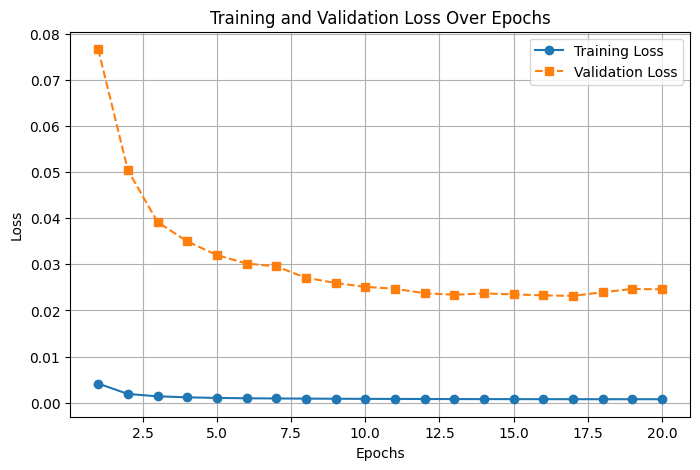

In [57]:
epochs = np.arange(1, base_epochs + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, cd2_model_train_loss, label="Training Loss", marker="o")
plt.plot(epochs, cd2_model_val_loss, label="Validation Loss", marker="s", linestyle="--")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Epochs")
plt.legend()
plt.grid(True)
plt.show()

[784, 128, 32, 10]

In [58]:
cd3_model = FFNN.FFNN([784, 128, 32, 10], X_train, y_train, X_val, y_val, learning_rate=base_learning_rate)
cd3_model.setActivationUniform(Activation.tanh)
cd3_model.initializeWeightRandomUniform(-1, 1)

cd3_model_train_loss, cd3_model_val_loss = cd3_model.train(batch_size=base_batch_size, learning_rate=base_learning_rate, epochs=base_epochs)
cd3_model.save("models/cd3_model")

 [Epoch 1]:	Training Loss: 0.002077437134208766	Validation Loss: 0.04501421240127375	Progress: [█                   ]
 [Epoch 2]:	Training Loss: 0.001331854094573999	Validation Loss: 0.04101886878803412	Progress: [██                  ]
 [Epoch 3]:	Training Loss: 0.0012306348011065572	Validation Loss: 0.03899009987159531	Progress: [███                 ]
 [Epoch 4]:	Training Loss: 0.0011609460823177758	Validation Loss: 0.03609216064477764	Progress: [████                ]
 [Epoch 5]:	Training Loss: 0.0011402637129094098	Validation Loss: 0.03726565827930403	Progress: [█████               ]
 [Epoch 6]:	Training Loss: 0.0011380357779321828	Validation Loss: 0.036997065003136924	Progress: [██████              ]
 [Epoch 7]:	Training Loss: 0.0011143029511433355	Validation Loss: 0.035493587884359815	Progress: [███████             ]
 [Epoch 8]:	Training Loss: 0.0010846305559428777	Validation Loss: 0.03464040216572321	Progress: [████████            ]
 [Epoch 9]:	Training Loss: 0.0010607471010312172

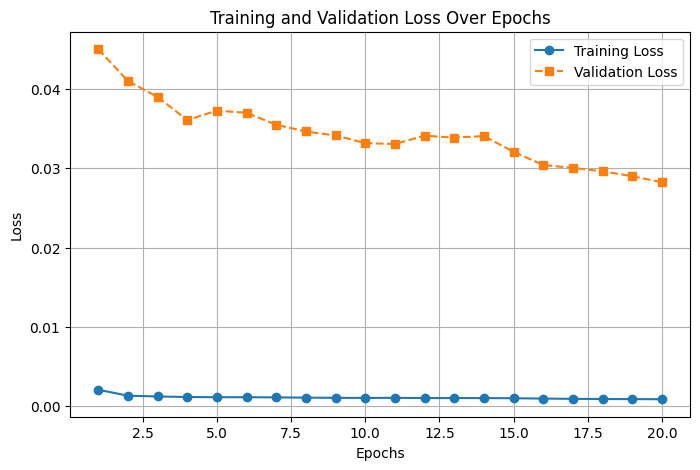

In [ ]:
epochs = np.arange(1, base_epochs + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, cd3_model_train_loss, label="Training Loss", marker="o")
plt.plot(epochs, cd3_model_val_loss, label="Validation Loss", marker="s", linestyle="--")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Epochs")
plt.legend()
plt.grid(True)
plt.show()

##### Constant Width [64 neurons]

[784, 64, 64, 10]

In [64]:
cw1_model = FFNN.FFNN([784, 64, 64, 10], X_train, y_train, X_val, y_val, learning_rate=base_learning_rate)
cw1_model.setActivationUniform(Activation.tanh)
cw1_model.initializeWeightRandomUniform(-1, 1)

cw1_model_train_loss, cw1_model_val_loss = cw1_model.train(batch_size=base_batch_size, learning_rate=base_learning_rate, epochs=base_epochs)
cw1_model.save("models/cw1_model")

 [Epoch 1]:	Training Loss: 0.0026024140462443898	Validation Loss: 0.05275876350533587	Progress: [█                   ]
 [Epoch 2]:	Training Loss: 0.0015758753768740966	Validation Loss: 0.04782995774966104	Progress: [██                  ]
 [Epoch 3]:	Training Loss: 0.001421601970182215	Validation Loss: 0.044594111492482914	Progress: [███                 ]
 [Epoch 4]:	Training Loss: 0.0013267727698628887	Validation Loss: 0.040856491565333414	Progress: [████                ]
 [Epoch 5]:	Training Loss: 0.0012328011274299355	Validation Loss: 0.03941802862085311	Progress: [█████               ]
 [Epoch 6]:	Training Loss: 0.0011812089278585862	Validation Loss: 0.03758436176021608	Progress: [██████              ]
 [Epoch 7]:	Training Loss: 0.001114501342642192	Validation Loss: 0.03529651994048343	Progress: [███████             ]
 [Epoch 8]:	Training Loss: 0.0010607633535297213	Validation Loss: 0.03462186166712282	Progress: [████████            ]
 [Epoch 9]:	Training Loss: 0.0010109984708902861

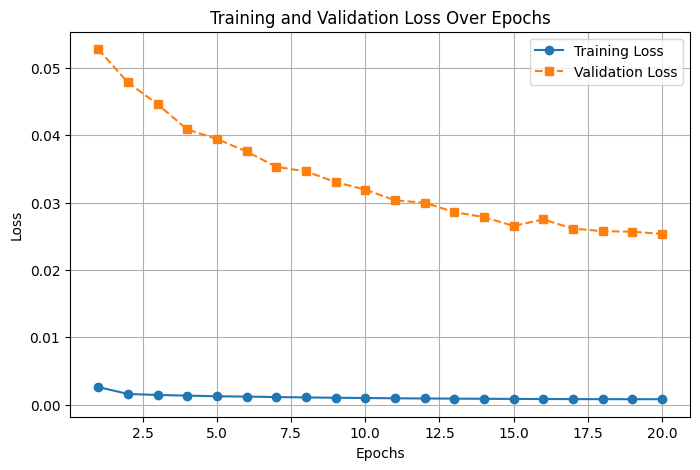

In [65]:
epochs = np.arange(1, base_epochs + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, cw1_model_train_loss, label="Training Loss", marker="o")
plt.plot(epochs, cw1_model_val_loss, label="Validation Loss", marker="s", linestyle="--")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Epochs")
plt.legend()
plt.grid(True)
plt.show()

[784, 64, 64, 64, 10]

In [66]:
cw2_model = FFNN.FFNN([784, 64, 64, 64, 10], X_train, y_train, X_val, y_val, learning_rate=base_learning_rate)
cw2_model.setActivationUniform(Activation.tanh)
cw2_model.initializeWeightRandomUniform(-1, 1)

cw2_model_train_loss, cw2_model_val_loss = cw2_model.train(batch_size=base_batch_size, learning_rate=base_learning_rate, epochs=base_epochs)
cw2_model.save("models/cw2_model")

 [Epoch 1]:	Training Loss: 0.0025757648657631946	Validation Loss: 0.04762870704645466	Progress: [█                   ]
 [Epoch 2]:	Training Loss: 0.0012970182785610404	Validation Loss: 0.0377242993982438	Progress: [██                  ]
 [Epoch 3]:	Training Loss: 0.0010780710824920463	Validation Loss: 0.03278432192151554	Progress: [███                 ]
 [Epoch 4]:	Training Loss: 0.0009725169379307922	Validation Loss: 0.03075580297326961	Progress: [████                ]
 [Epoch 5]:	Training Loss: 0.0009238574218075808	Validation Loss: 0.028907762766974775	Progress: [█████               ]
 [Epoch 6]:	Training Loss: 0.0008999815282139729	Validation Loss: 0.02929232684542674	Progress: [██████              ]
 [Epoch 7]:	Training Loss: 0.0008883126446123712	Validation Loss: 0.028665265671606325	Progress: [███████             ]
 [Epoch 8]:	Training Loss: 0.000854009048120397	Validation Loss: 0.02822534229413928	Progress: [████████            ]
 [Epoch 9]:	Training Loss: 0.0008287791389858564

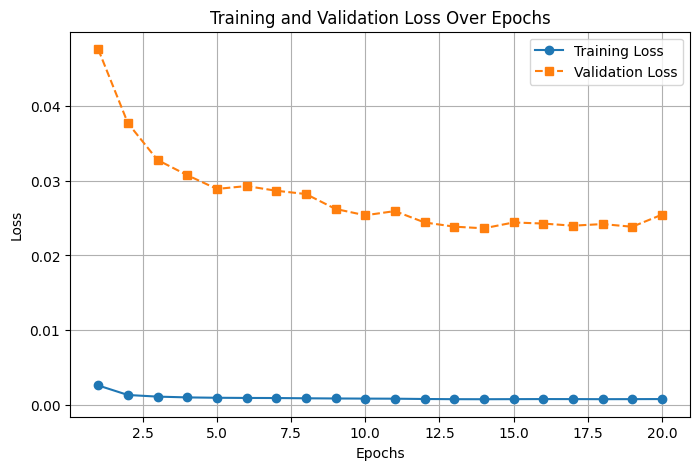

In [67]:
epochs = np.arange(1, base_epochs + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, cw2_model_train_loss, label="Training Loss", marker="o")
plt.plot(epochs, cw2_model_val_loss, label="Validation Loss", marker="s", linestyle="--")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Epochs")
plt.legend()
plt.grid(True)
plt.show()

[784, 64, 64, 64, 64, 10]

In [68]:
cw3_model = FFNN.FFNN([784, 64, 64, 64, 64, 10], X_train, y_train, X_val, y_val, learning_rate=base_learning_rate)
cw3_model.setActivationUniform(Activation.tanh)
cw3_model.initializeWeightRandomUniform(-1, 1)

cw3_model_train_loss, cw3_model_val_loss = cw3_model.train(batch_size=base_batch_size, learning_rate=base_learning_rate, epochs=base_epochs)
cw3_model.save("models/cw3_model")

 [Epoch 1]:	Training Loss: 0.003219876936702972	Validation Loss: 0.06518242143773711	Progress: [█                   ]
 [Epoch 2]:	Training Loss: 0.0017402468943384362	Validation Loss: 0.048913140642330696	Progress: [██                  ]
 [Epoch 3]:	Training Loss: 0.0014074903199812214	Validation Loss: 0.04182791539909665	Progress: [███                 ]
 [Epoch 4]:	Training Loss: 0.0012003176391017138	Validation Loss: 0.035837438756745534	Progress: [████                ]
 [Epoch 5]:	Training Loss: 0.0010735679955670753	Validation Loss: 0.03348817852325981	Progress: [█████               ]
 [Epoch 6]:	Training Loss: 0.0009930843644133992	Validation Loss: 0.03033333664683513	Progress: [██████              ]
 [Epoch 7]:	Training Loss: 0.0009299888434350003	Validation Loss: 0.028947306526833715	Progress: [███████             ]
 [Epoch 8]:	Training Loss: 0.0008845361263567745	Validation Loss: 0.02785008887498348	Progress: [████████            ]
 [Epoch 9]:	Training Loss: 0.00085037889945776

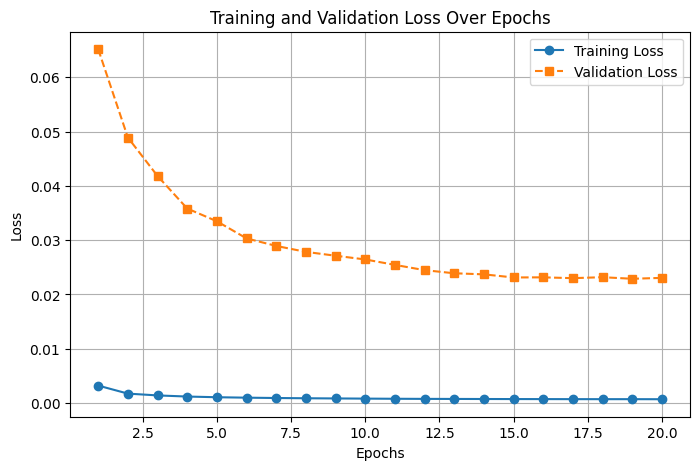

In [69]:
epochs = np.arange(1, base_epochs + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, cw3_model_train_loss, label="Training Loss", marker="o")
plt.plot(epochs, cw3_model_val_loss, label="Validation Loss", marker="s", linestyle="--")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Epochs")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
m1 = FFNN.FFNN.load("models/zero_weights_model")
m2 = FFNN.FFNN.load("models/base_model")


m3 = FFNN.FFNN.load("models/random_normal_weights_model")

Successfuly loaded 'models/zero_weights_model'
Successfuly loaded 'models/base_model'
Successfuly loaded 'models/random_normal_weights_model'


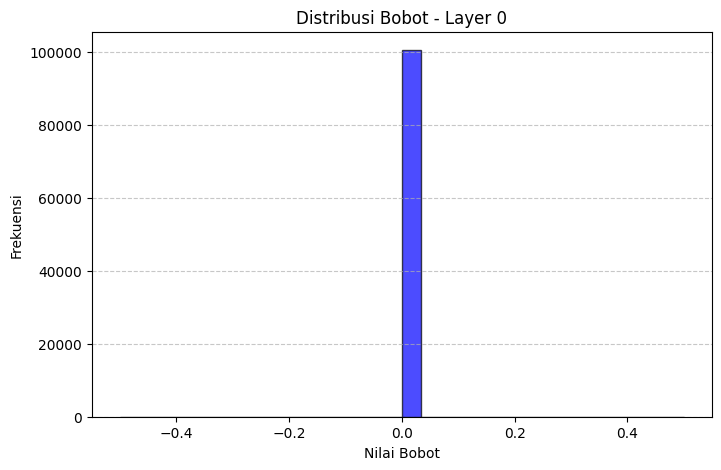

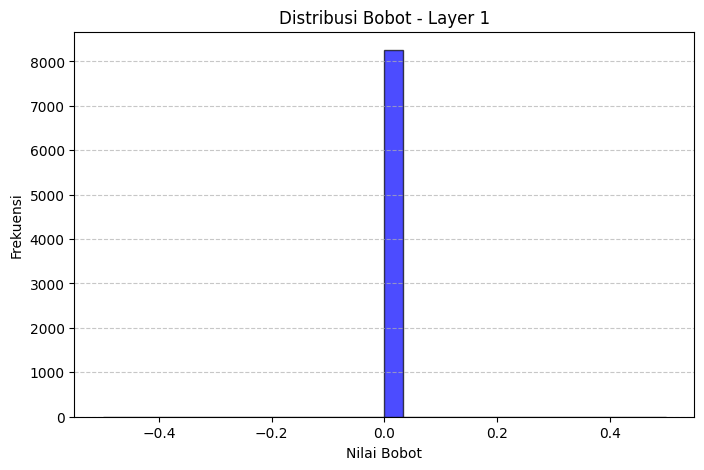

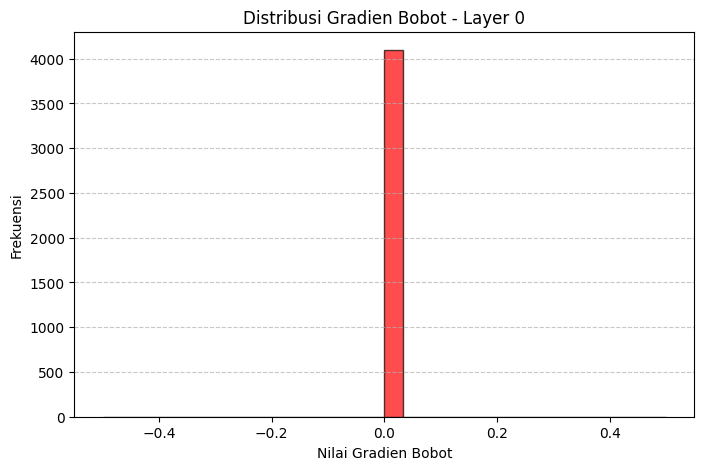

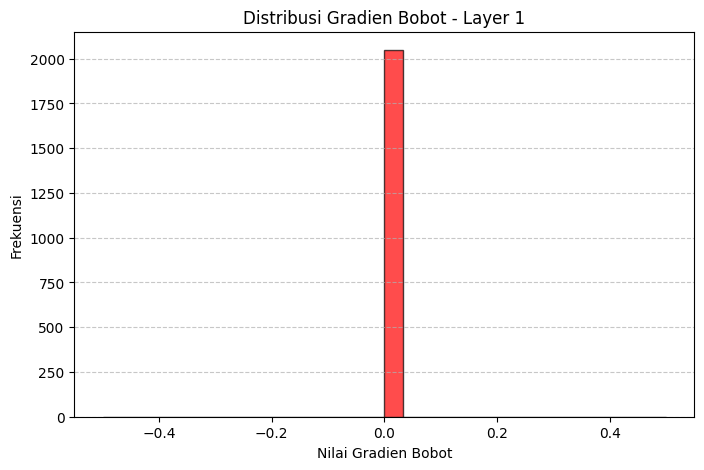

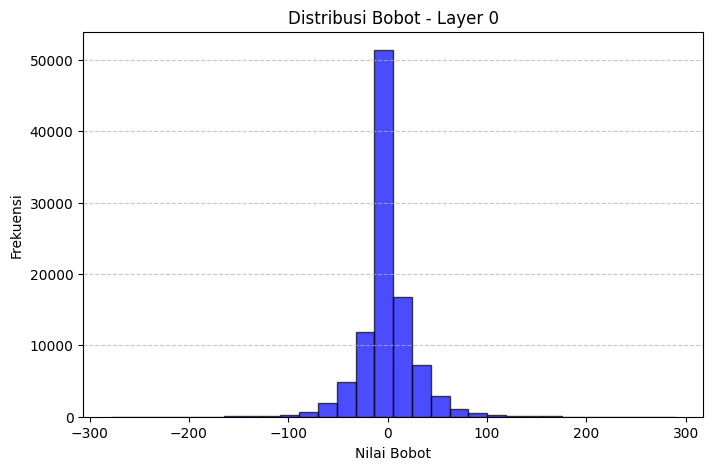

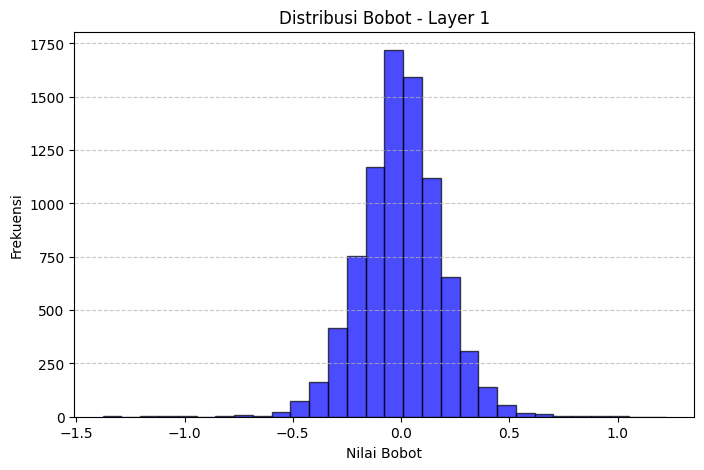

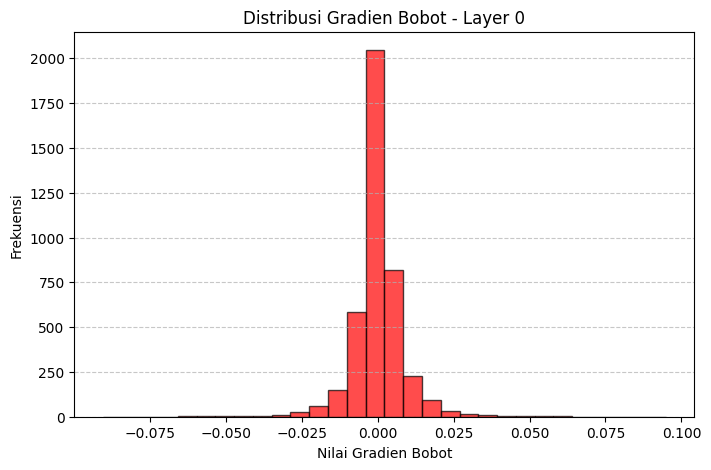

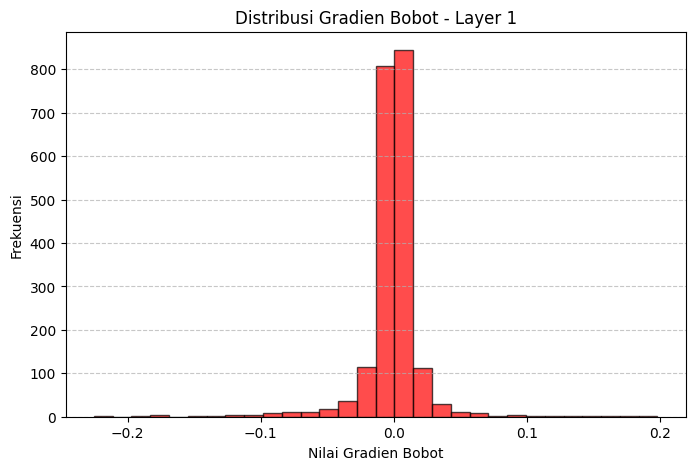

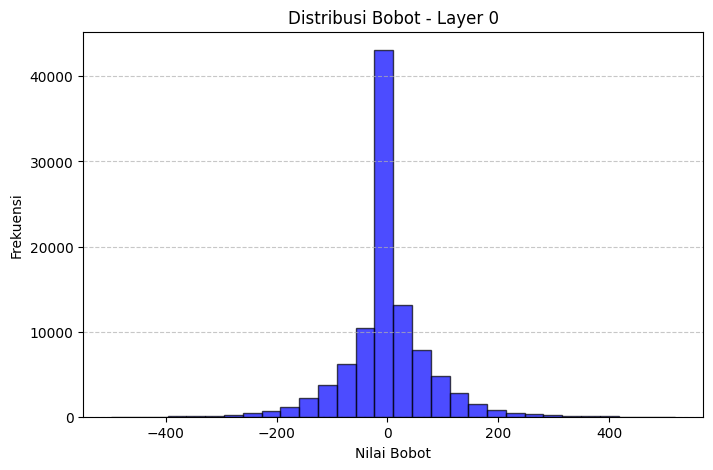

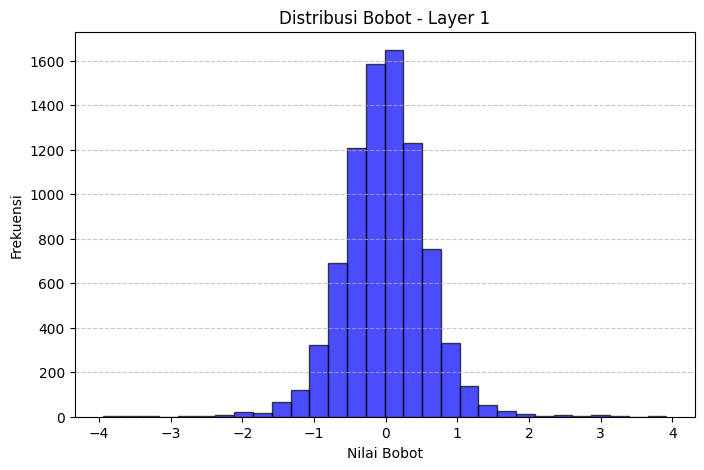

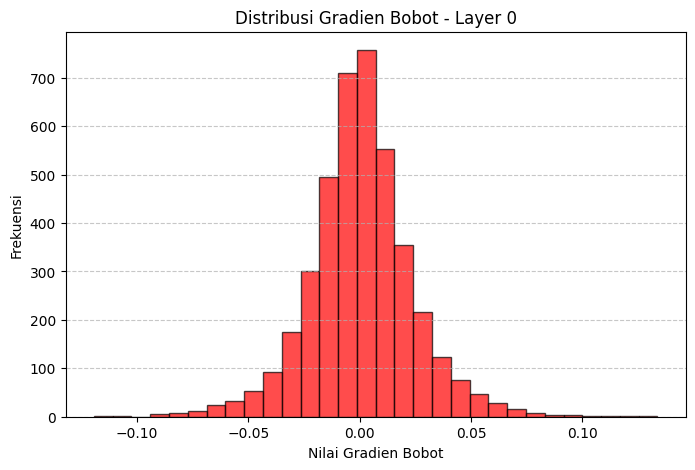

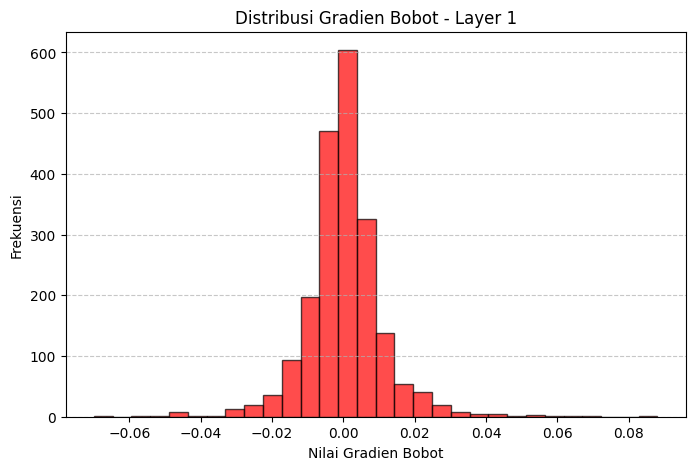

In [6]:
m1.plot_weight_distribution([0, 1])
m1.plot_gradient_distribution([0, 1])

m2.plot_weight_distribution([0, 1])
m2.plot_gradient_distribution([0, 1])

m3.plot_weight_distribution([0, 1])
m3.plot_gradient_distribution([0, 1])
